In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

penguins = sns.load_dataset("penguins")
penguins = penguins.fillna(value={'bill_length_mm': 0, 'bill_depth_mm': 0, 'flipper_length_mm': 0, 'body_mass_g': 0, 'sex':'Unkown'})
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             0.0            0.0                0.0   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          0.0  Unkown  
4       3450.0  Female

In [3]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['sex'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(240, 7) (104, 7)


In [4]:
print(len(penguins))
print(len(penguins_train))
print(len(penguins_test))

344
240
104


In [5]:
features= ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
dt_classification = DecisionTreeClassifier(max_depth = 4) # Increase max_depth to see effect in the plot
dt_classification.fit(penguins_train[features], penguins_train['sex'])

DecisionTreeClassifier(max_depth=4)

In [6]:
predictions = dt_classification.predict(penguins[features])

def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

(len(predictions), len(penguins.sex))

(344, 344)

In [7]:
predictionsOnTrainset = dt_classification.predict(penguins_train[features])
predictionsOnTestset = dt_classification.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.sex)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.sex)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9333333333333333
Accuracy on test set 0.8365384615384616


In [8]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph

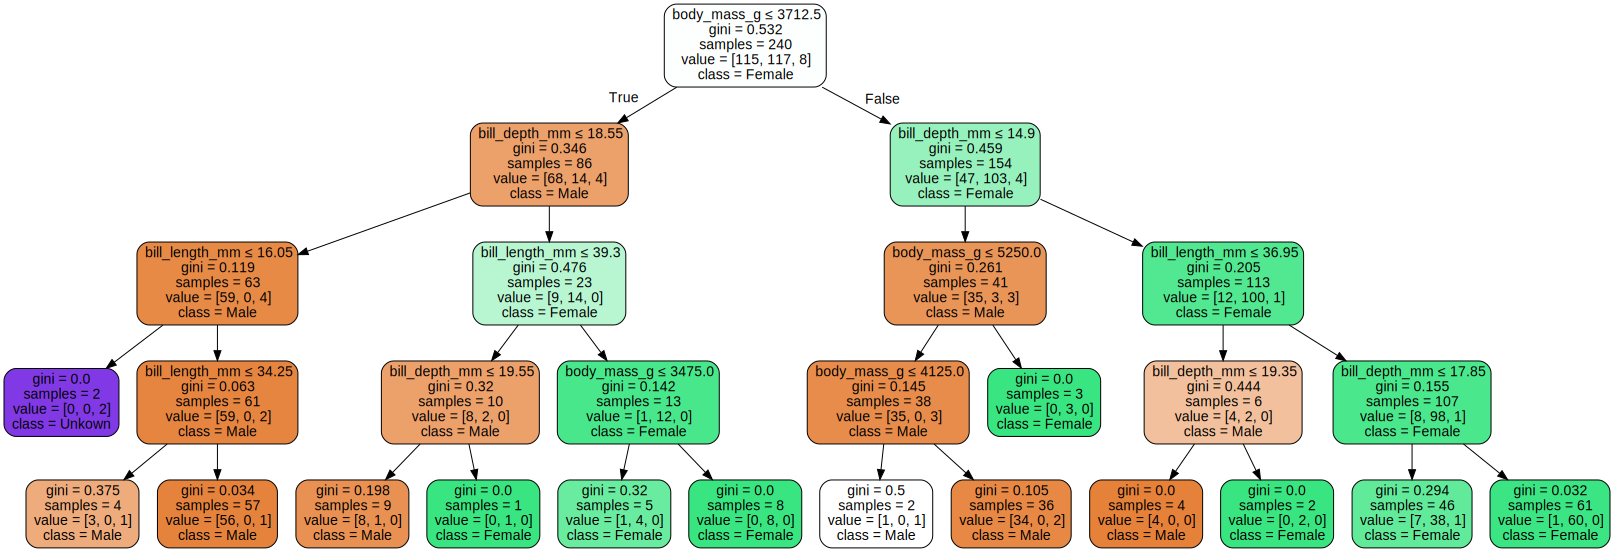

In [9]:
plot_tree_classification(dt_classification, features, penguins.sex.unique())

In [10]:
penguins_nan = sns.load_dataset("penguins")
penguins_nan = penguins_nan[penguins_nan.isnull().any(axis=1)].dropna(thresh=4)
penguins_nan

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   

     body_mass_g  sex  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
47        2975.0  NaN  
246       4100.0  NaN  
286       4650.0  NaN  
324       4725.0  NaN  
336       4875.0  NaN

In [11]:
dt_classification.predict(penguins_nan[features])

array(['Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male'], dtype=object)